In [1]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np


In [2]:
from utils.utils import feature_extractor, apply_umap, plot_umap, load_cifar10

class_names = [
    "Airplane", "Automobile", "Bird", "Cat", "Deer",
    "Dog", "Frog", "Horse", "Ship", "Truck"
]
# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/home/redix/Desktop/prml/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
@feature_extractor
def hog_feature_extractor(images, pixels_per_cell=(8, 8), cells_per_block=(2, 2)):
    """Extracts HOG features from images."""
    from skimage.feature import hog
    return np.array([
        hog(np.transpose(img, (1, 2, 0)), pixels_per_cell=pixels_per_cell, cells_per_block=cells_per_block, channel_axis=-1)
        for img in images
    ])

In [7]:
def sample_random_images(dataset, num_samples=1000):
    import random
    indices = random.sample(range(len(dataset)), num_samples)
    images, labels = zip(*[dataset[i] for i in indices]) 
    return images, np.array(labels)

In [8]:
dataloader = load_cifar10()
images, labels = sample_random_images(dataloader.dataset, 3000)
features, _ = hog_feature_extractor(images)

In [9]:
umap_embeddings = apply_umap(features)

/home/redix/Desktop/prml/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/redix/Desktop/prml/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


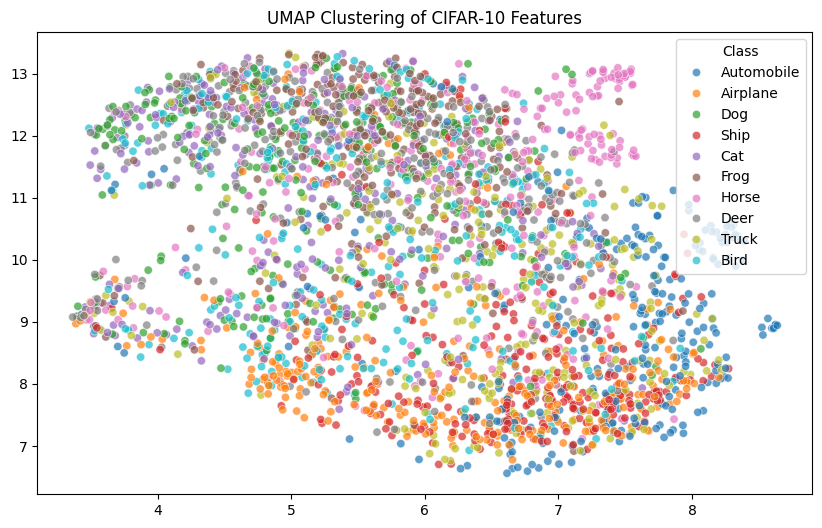

In [10]:
plot_umap(umap_embeddings, labels, class_names)

/home/redix/Desktop/prml/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/redix/Desktop/prml/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


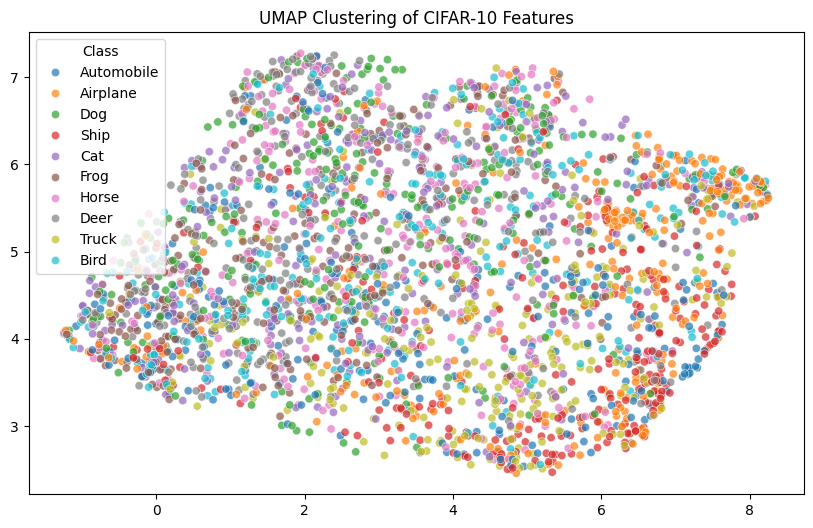

In [11]:
images_flattened = np.array([img.numpy().flatten() for img in images])
umap_embeddings = apply_umap(images_flattened)
plot_umap(umap_embeddings, labels, class_names)